In [1]:
import numpy as np
import tensorflow as tf
from keras.models import load_model
import pandas as pd
import random as rd

In [2]:
#usage in (MT CO2e) and credits in (tonnes)
data1 = {'Name':['Exxon','Chevren','BP','Royal Dutch','Aramcoo','JMM','Aviation','Kingcoal','Chemcal','Supnics']}
df1 = pd.DataFrame(data1)

data2 = {'Usage':[721.076,64.442,64.084,60.842,61.798,66.538,172.626,811.791,72.559,823.74]}
df2 = pd.DataFrame(data2)
        
data3 = {'Required_Credits':[506,386,100,120,840,150,220,935,1000,367]}
df3 = pd.DataFrame(data3)


In [3]:
def general(n):
    a = rd.choices(df1.Name,k=n)
    b = rd.choices(df2.Usage,k=n)
    c = rd.choices(df3.Required_Credits,k=n)
    dataset = pd.DataFrame({'Name':a,'Usage':b,'Required_Credits':c})
    return dataset

In [4]:
cube = general(100)
cube

,Name,Usage,Required_Credits
0,Chevren,64.442,386
1,Kingcoal,811.791,386
2,Supnics,823.740,220
3,Chevren,721.076,100
4,JMM,721.076,935
...,...,...,...
95,Chevren,72.559,386
96,Royal Dutch,60.842,1000
97,Chemcal,64.442,367
98,BP,64.084,150


In [5]:
to_model = cube.columns[1:4]

In [6]:
from sklearn.ensemble import IsolationForest
ip = ['Usage','Required_Credits']
model_IF = IsolationForest(contamination=0.1,random_state=42,n_estimators=100,max_samples='auto',max_features=1.0)
model_IF.fit(cube[ip])

IsolationForest(contamination=0.1, random_state=42)

In [7]:
import joblib
joblib.dump(model_IF, 'isolation_forest_model.joblib')


['isolation_forest_model.joblib']

In [8]:
cube['Score'] = model_IF.decision_function(cube[ip])


In [9]:
cube['Anomaly'] = model_IF.predict(cube[ip])

In [10]:
cube.loc[:, ['Usage','Required_Credits','Score','Anomaly'] ]

,Usage,Required_Credits,Score,Anomaly
0,64.442,386,0.164124,1
1,811.791,386,0.112460,1
2,823.740,220,0.006643,1
3,721.076,100,0.001020,1
4,721.076,935,0.020852,1
...,...,...,...,...
95,72.559,386,0.071864,1
96,60.842,1000,0.009228,1
97,64.442,367,0.151959,1
98,64.084,150,0.139263,1


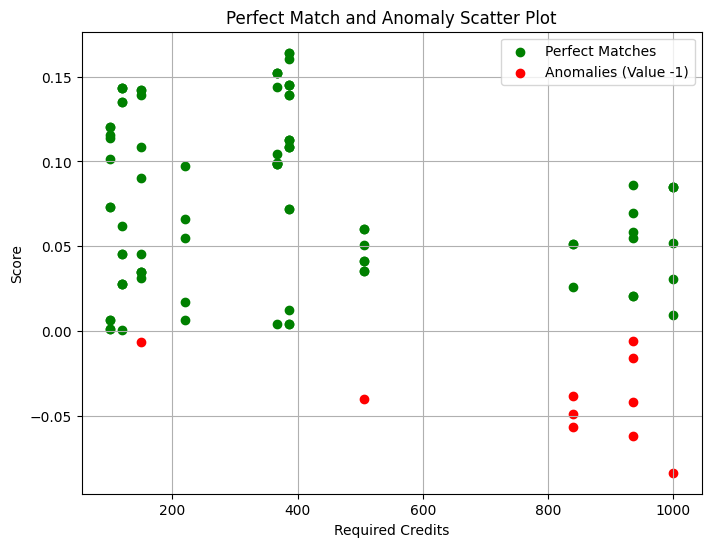

In [11]:
import matplotlib.pyplot as plt
perfect_matches = cube[cube['Anomaly'] == 1]

# Extract cube for anomalies (Anomaly == -1)
anomalies = cube[cube['Anomaly'] == -1]

# Create a scatter plot for perfect matches
plt.figure(figsize=(8, 6))
plt.scatter(perfect_matches['Required_Credits'], perfect_matches['Score'], c='green', label='Perfect Matches')

# Add a scatter plot for anomalies in a different color
plt.scatter(anomalies['Required_Credits'], anomalies['Score'], c='red', label='Anomalies (Value -1)')

plt.xlabel('Required Credits')
plt.ylabel('Score')
plt.title('Perfect Match and Anomaly Scatter Plot')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



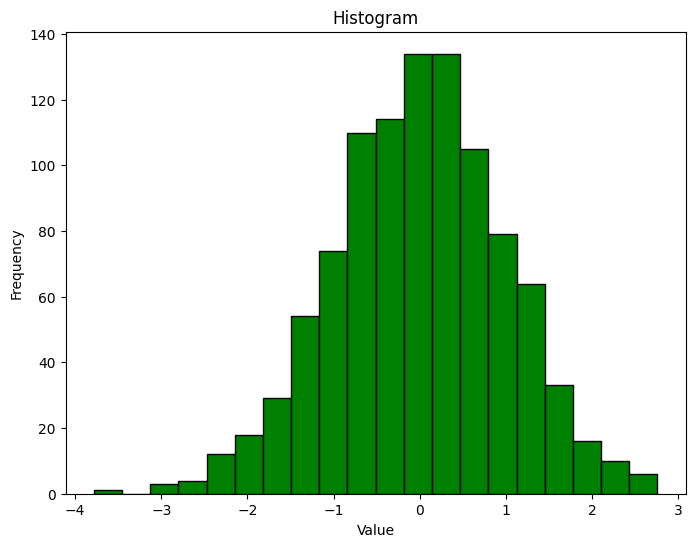

In [12]:
import matplotlib.pyplot as plt
import numpy as np


data = np.random.normal(0, 1, 1000)  


plt.figure(figsize=(8, 6))
plt.hist(data, bins=20, color='green', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')


plt.show()


In [13]:
x = cube[cube['Anomaly'] == -1]

In [14]:
x

,Name,Usage,Required_Credits,Score,Anomaly
23,Aramcoo,172.626,935,-0.062078,-1
26,Exxon,172.626,506,-0.040138,-1
28,BP,721.076,1000,-0.083695,-1
42,Aviation,811.791,935,-0.016125,-1
50,Aramcoo,823.740,150,-0.006602,-1
66,Aviation,72.559,935,-0.005870,-1
72,Exxon,811.791,840,-0.038196,-1
77,Aviation,823.740,935,-0.042065,-1
78,JMM,172.626,840,-0.056719,-1
82,Supnics,721.076,840,-0.049067,-1
